# 配置环境

In [1]:
import time

from pyAgrum.lib.bn2graph import BN2dot
import numpy as np
import pandas as pd

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.explain as expl

import matplotlib.pyplot as plt
print("Setup Complete")

Setup Complete


In [32]:
template=gum.fastBN("X1->X2->Y;X3->Z->Y;X0->Z;X1->Z;X2->R[5];Z->R;X1->Y")
data_path = "out/pyagrum-output/Data_6var_direct_indirect.csv" 

#gum.generateCSV(template,data_path,1000)

learner = gum.BNLearner(data_path,template)
bn = learner.learnParameters(template.dag())
bn

(pyAgrum.BayesNet<double>@0x55ac7d2ac8d0) BN{nodes: 7, arcs: 9, domainSize: 320, dim: 62}

In [15]:
print(bn)

BN{nodes: 7, arcs: 9, domainSize: 320, dim: 62}


In [16]:
print(expl.ShapValues.__doc__)


  The ShapValue class implements the calculation of Shap values in Bayesian networks.

  The main implementation is based on Conditional Shap values [3]_, but the Interventional calculation method proposed in [2]_ is also present. In addition, a new causal method, based on [1]_, is implemented which is well suited for Bayesian networks.

.. [1] Heskes, T., Sijben, E., Bucur, I., & Claassen, T. (2020). Causal Shapley Values: Exploiting Causal Knowledge. 34th Conference on Neural Information Processing Systems. Vancouver, Canada.

.. [2] Janzing, D., Minorics, L., & Blöbaum, P. (2019). Feature relevance quantification in explainable AI: A causality problem. arXiv: Machine Learning. Retrieved 6 24, 2021, from https://arxiv.org/abs/1910.13413

.. [3] Lundberg, S. M., & Su-In, L. (2017). A Unified Approach to Interpreting Model. 31st Conference on Neural Information Processing Systems. Long Beach, CA, USA.
  


In [19]:
gumshap = expl.ShapValues(bn, 'Y')

In [20]:
train = pd.read_csv(data_path).sample(frac=1.)

Run Time : 9.218258619308472 sec


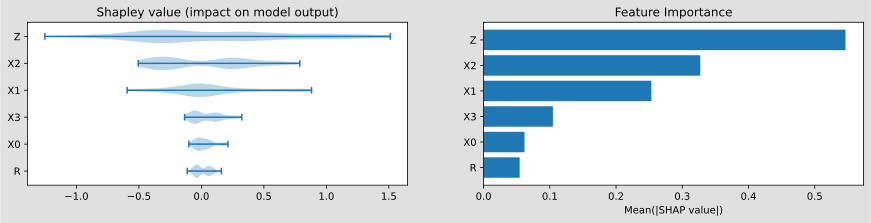

In [21]:
t_start = time.time()
resultat = gumshap.conditional(train, plot=True,plot_importance=True,percentage=False)
print(f'Run Time : {time.time()-t_start} sec')

Run Time : 9.014690399169922 sec


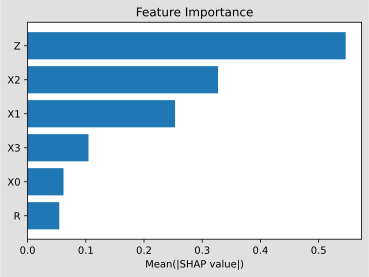

In [22]:
t_start = time.time()
resultat = gumshap.conditional(train, plot=False,plot_importance=True,percentage=False)
print(f'Run Time : {time.time()-t_start} sec')

Run Time : 9.015342950820923 sec


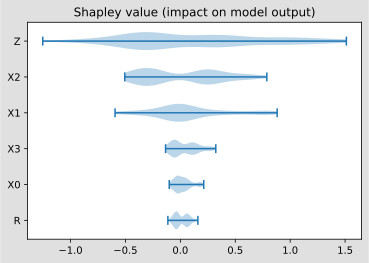

In [23]:
t_start = time.time()
resultat = gumshap.conditional(train, plot=True,plot_importance=False,percentage=False)
print(f'Run Time : {time.time()-t_start} sec')

In [24]:
t_start = time.time()
resultat = gumshap.conditional(train, plot=False,plot_importance=False,percentage=False)
print(f'Run Time : {time.time()-t_start} sec')
resultat

Run Time : 8.939270973205566 sec


{'X0': 0.06176712200000175,
 'X3': 0.10465402104047898,
 'X2': 0.3271606443752006,
 'X1': 0.2533375405370652,
 'R': 0.054456334441524014,
 'Z': 0.5464180054433385}

Run Time : 10.962069034576416 sec


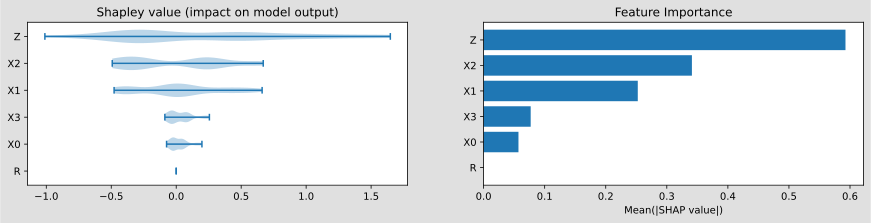

In [25]:

t_start = time.time()
causal = gumshap.causal(train, plot=True, plot_importance=True, percentage=False)
print(f'Run Time : {time.time()-t_start} sec')

Run Time : 55.24196672439575 sec
{'X0': 0.0, 'X3': 0.0, 'X2': 0.38420340881701687, 'X1': 0.31016272890504815, 'R': 0.0, 'Z': 0.5475262894290508}


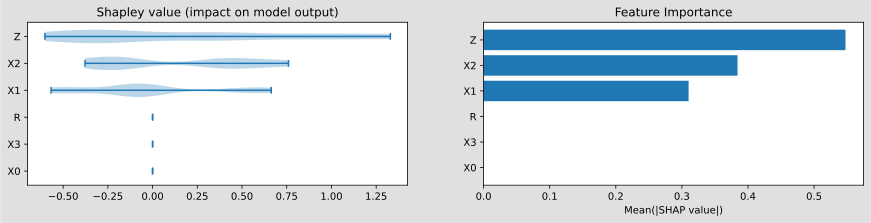

In [26]:
t_start = time.time()
marginal = gumshap.marginal(train, sample_size=10, plot=True,plot_importance=True,percentage=False)
print(f'Run Time : {time.time()-t_start} sec')
print(marginal)

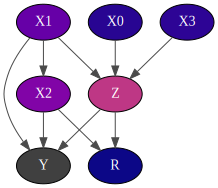

In [33]:
import pyAgrum.lib.notebook as gnb

g = gumshap.showShapValues(causal)
gnb.showGraph(g)


In [31]:
expl.showInformation(bn)